In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from datasets.droid_small import DroidDataset

In [2]:
def show_frames(frames):
    """Utility to display a sequence of frames."""
    # frames: (k, 3, H, W)
    frames = frames.clone()  # avoid modifying in-place
    frames = frames.permute(0, 2, 3, 1)  # (k, H, W, 3)
    frames = frames.numpy()

    k = frames.shape[0]
    fig, axes = plt.subplots(1, k, figsize=(k * 3, 3))
    if k == 1:
        axes = [axes]
    for i in range(k):
        axes[i].imshow(frames[i])
        axes[i].axis('off')
    plt.show()

def show_label(label):
    # label is 3xHxW, but can have negative values (since it's frame difference)
    label_np = label.permute(1, 2, 0).numpy()  # (H, W, C)
    label_np = (label_np - label_np.min()) / (label_np.max() - label_np.min() + 1e-8)  # normalize to [0,1] for visualization

    plt.figure(figsize=(5, 5))
    plt.imshow(label_np)
    plt.axis('off')
    plt.title("Label (Next Frame - Current Frame)")
    plt.show()

def show_ground_truth(frame):
    plt.figure(figsize=(5, 5))
    plt.imshow(frame.permute(1, 2, 0).numpy())
    plt.axis('off')
    plt.title("Ground Truth (Next Frame)")
    plt.show()

frames_cond shape: torch.Size([5, 3, 180, 320])
actions shape: torch.Size([5, 8])
label shape: torch.Size([3, 180, 320])


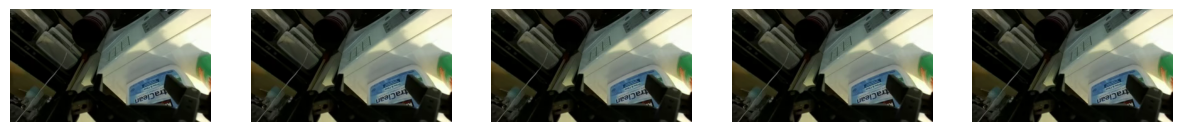

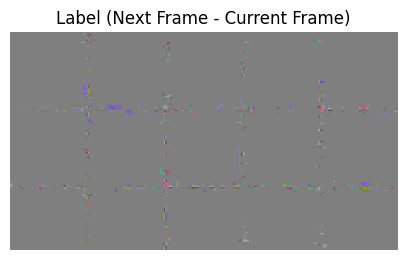

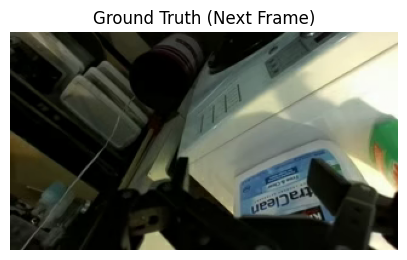

In [3]:
dataset = DroidDataset(k=5, dir="data/droid_small", video_source="observation.images.wrist_left")

# Pick a random sample
idx = 10
frames_cond, actions, label, frame_next = dataset[idx]

print(f"frames_cond shape: {frames_cond.shape}")  # (k, 3, H, W)
print(f"actions shape: {actions.shape}")          # (k, action_dim)
print(f"label shape: {label.shape}")              # (3, H, W)

show_frames(frames_cond)
show_label(label)
show_ground_truth(frame_next)

dataset.close()

In [6]:
len(dataset)

25643

In [4]:
torch.max(frames_cond), torch.min(frames_cond)

(tensor(1.), tensor(0.))

frames_cond shape: torch.Size([5, 3, 64, 64])
actions shape: torch.Size([5, 8])
label shape: torch.Size([3, 64, 64])


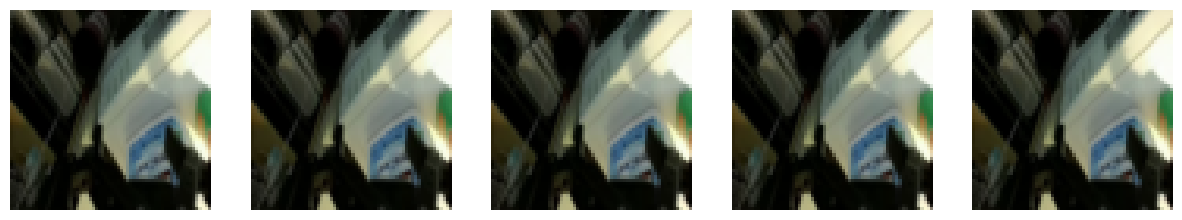

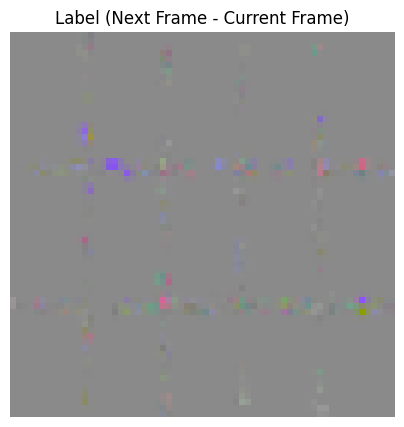

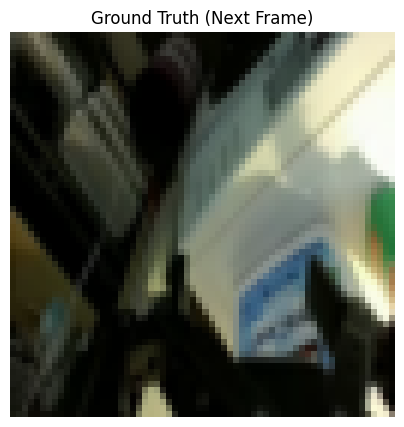

In [5]:
dataset = DroidDataset(k=5, frame_size=(64, 64), dir="data/droid_small", video_source="observation.images.wrist_left")

# Pick a random sample
idx = 10
frames_cond, actions, label, frame_next = dataset[idx]

print(f"frames_cond shape: {frames_cond.shape}")  # (k, 3, H, W)
print(f"actions shape: {actions.shape}")          # (k, action_dim)
print(f"label shape: {label.shape}")              # (3, H, W)

show_frames(frames_cond)
show_label(label)
show_ground_truth(frame_next)

dataset.close()